In [126]:
#Importing the neccessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import statsmodels.api as stm


In [ ]:
#listing files in current directory
for entry in os.scandir('.'):
    if entry.is_file():
        #print(entry.name)

In [9]:
#Reading the train data
H=pd.read_csv('wk3_kc_house_train_data.csv')
H.shape

(9761, 21)

In [16]:
#Variables
H.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Dropping unwanted columns
H1=H.drop(columns=['id','date','lat','long'])

In [8]:
#Checking for null values in the Training Data
H1.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [120]:
#Unique values in variables
print("Unique Bedrooms-->",sorted(set(H1.bedrooms.unique())))
print("Unique Bathrooms-->",sorted(set(H1.bathrooms.unique())))
print("Unique Floors-->",sorted(set(H1.floors.unique())))
print("Unique Waterfront-->",H1.waterfront.unique())
print("View-->",sorted(set(H1.view.unique())))
print("Condition-->",sorted(set(H1.condition.unique())))
print("Grade-->",sorted(set(H1.grade.unique())))

Unique Bedrooms--> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Unique Bathrooms--> [0.0, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 7.5, 7.75, 8.0]
Unique Floors--> [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
Unique Waterfront--> [0 1]
View--> [0, 1, 2, 3, 4]
Condition--> [1, 2, 3, 4, 5]
Grade--> [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [31]:
#Unique Zipcodes in the DataSet
np.count_nonzero(H1.zipcode.unique())

70

In [65]:
#Some Statistics of the Target Varaible
print ("Mean Price-->",H1.price.mean())
print ("Median Price-->",H1.price.median())
print("Maximum Price-->",H1.price.max())
print("Minimum Price-->",H1.price.min())
H1.price.describe().round()

Mean Price--> 542734.9516442987
Median Price--> 450000.0
Maximum Price--> 7700000.0
Minimum Price--> 80000.0


count       9761.0
mean      542735.0
std       379528.0
min        80000.0
25%       320000.0
50%       450000.0
75%       649000.0
max      7700000.0
Name: price, dtype: float64

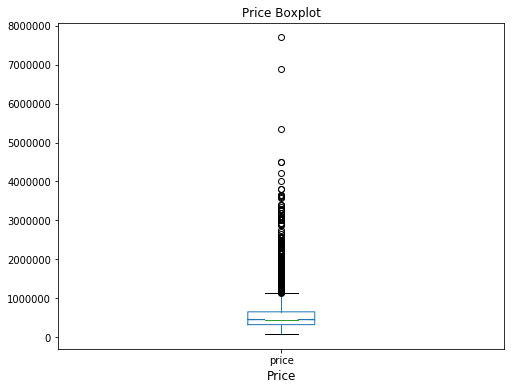

In [48]:
#Plotting the price variable
H1.boxplot(column="price",notch=True,grid=False,figsize=(8,6),vert=True)
plt.xlabel("Price",fontsize=12)
plt.title("Price Boxplot",fontsize=12)
plt.show()

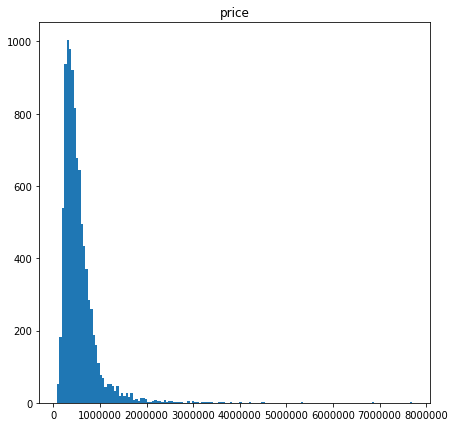

In [49]:
H1.hist(column="price",grid=False,figsize=(7,7),bins=150)
plt.show()

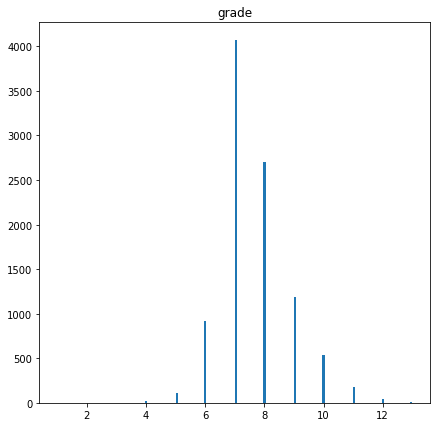

In [50]:
H1.hist(column="grade",grid=False,figsize=(7,7),bins=150)
plt.show()

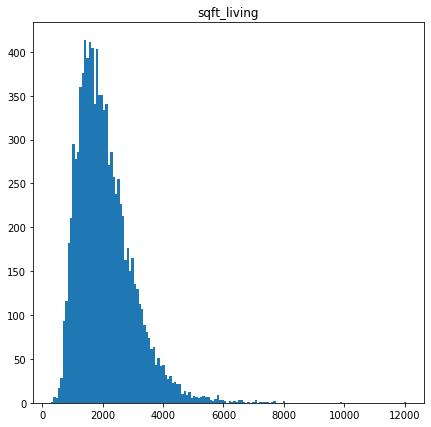

In [51]:
H1.hist(column="sqft_living",grid=False,figsize=(7,7),bins=150)
plt.show()

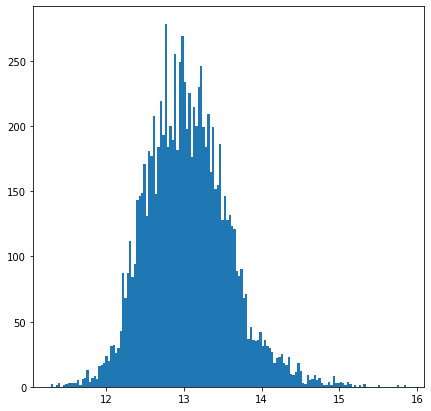

In [52]:
df=np.log(H1.price)
df.hist(grid=False,figsize=(7,7),bins=150)

In [ ]:
plt.boxplot(np.log(H1.price), vert=True)
plt.show()

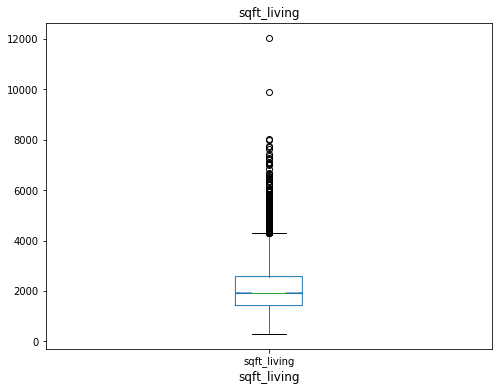

In [53]:
H1.boxplot(column="sqft_living",notch=True,grid=False,figsize=(8,6),vert=True)
plt.xlabel("sqft_living",fontsize=12)
plt.title("sqft_living",fontsize=12)
plt.show()

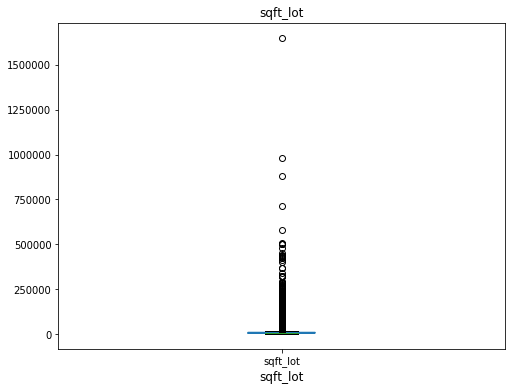

In [54]:
H1.boxplot(column="sqft_lot",notch=True,grid=False,figsize=(8,6),vert=True)
plt.xlabel("sqft_lot",fontsize=12)
plt.title("sqft_lot",fontsize=12)
plt.show()

In [66]:
H1.sqft_living.describe()

count     9761.000000
mean      2086.734146
std        927.194303
min        290.000000
25%       1420.000000
50%       1910.000000
75%       2570.000000
max      12050.000000
Name: sqft_living, dtype: float64

In [57]:
P_B=H1[["price","bedrooms"]].groupby(["bedrooms"]).describe()
P_B.round()

price                                                      \
           count       mean        std       min       25%       50%   
bedrooms                                                               
0            6.0   420108.0   434370.0  142000.0  229750.0  250000.0   
1           88.0   317475.0   135357.0   80000.0  226250.0  307500.0   
2         1255.0   402976.0   205703.0   81000.0  269975.0  375000.0   
3         4417.0   465060.0   270190.0   86500.0  292000.0  405000.0   
4         3094.0   639871.0   397744.0  152500.0  375000.0  550000.0   
5          755.0   786314.0   573619.0  133000.0  449750.0  614285.0   
6          116.0   910483.0  1036003.0  194990.0  407500.0  652500.0   
7           17.0   888421.0   724113.0  280000.0  539000.0  580000.0   
8            7.0  1318714.0  1063582.0  373000.0  565000.0  808000.0   
9            3.0   694667.0   242044.0  450000.0  575000.0  700000.0   
10           1.0   650000.0        NaN  650000.0  650000.0  650000.0   
11           1.0   520000.0        NaN  520000.0  520000.0  520000.0   
33           1.0   640000.0        NaN  640000.0  640000.0  640000.0   

                                
                75%        max  
bedrooms                        
0          332500.0  1295650.0  
1          390000.0   680000.0  
2          487000.0  3278000.0  
3          560000.0  3800000.0  
4          770000.0  4489000.0  
5          905000.0  5350000.0  
6          936388.0  7700000.0  
7          936000.0  3200000.0  
8         1810000.0  3300000.0  
9          817000.0   934000.0  
10         650000.0   650000.0  
11         520000.0   520000.0  
33         640000.0   640000.0

In [58]:
P_B=H1[["price","floors"]].groupby(["floors"]).describe()
P_B.round()

price                                                        \
         count       mean        std       min        25%        50%   
floors                                                                 
1.0     4862.0   439664.0   264881.0   80000.0   275000.0   383075.0   
1.5      867.0   576777.0   328856.0  123300.0   380000.0   536000.0   
2.0     3723.0   655950.0   441032.0  139500.0   379000.0   550000.0   
2.5       62.0  1167610.0  1164878.0  255000.0   499250.0   802100.0   
3.0      245.0   577988.0   361580.0  205000.0   380500.0   474950.0   
3.5        2.0  1912500.0  1962221.0  525000.0  1218750.0  1912500.0   

                              
              75%        max  
floors                        
1.0      529000.0  3800000.0  
1.5      687750.0  3650000.0  
2.0      785000.0  6885000.0  
2.5     1343750.0  7700000.0  
3.0      610000.0  3100000.0  
3.5     2606250.0  3300000.0

In [129]:
H1.loc[H1.floors==3.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
6756,525000.0,3,3.0,1730,1074,3.5,0,0,3,8,1730,0,2006,0,98107,1370,1185
8377,3300000.0,8,4.0,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,4210,8325


In [59]:
P_B=H1[["price","waterfront"]].groupby(["waterfront"]).describe()
P_B.round()

price                                                       \
             count       mean        std       min       25%        50%   
waterfront                                                                
0           9679.0   533130.0   354723.0   80000.0  319970.0   449950.0   
1             82.0  1676508.0  1004797.0  285000.0  760000.0  1582500.0   

                                  
                  75%        max  
waterfront                        
0            640000.0  7700000.0  
1           2300000.0  4500000.0

In [61]:
P_B=H1[["price","view"]].groupby(["view"]).describe()
P_B.round()

price                                                                  \
       count       mean        std       min       25%        50%        75%   
view                                                                           
0     8748.0   496360.0   293912.0   80000.0  310000.0   430000.0   600000.0   
1      160.0   815072.0   503057.0  217000.0  508000.0   680000.0   958750.0   
2      454.0   793125.0   465715.0  169317.0  500000.0   681000.0   950000.0   
3      243.0   947250.0   654123.0  154000.0  550000.0   790000.0  1214250.0   
4      156.0  1505171.0  1031124.0  252000.0  807500.0  1195000.0  1910000.0   

                 
            max  
view             
0     4489000.0  
1     3345000.0  
2     3800000.0  
3     7700000.0  
4     6885000.0

In [62]:
P_B=H1[["price","grade"]].groupby(["grade"]).describe()
P_B.round()

price                                                         \
        count       mean        std        min        25%        50%   
grade                                                                  
1         1.0   142000.0        NaN   142000.0   142000.0   142000.0   
4        17.0   220885.0    99513.0    80000.0   151000.0   217000.0   
5       107.0   228089.0    91643.0    81000.0   157500.0   215000.0   
6       914.0   303697.0   125565.0    86500.0   215000.0   280000.0   
7      4067.0   401652.0   157474.0   100000.0   284525.0   371000.0   
8      2707.0   542507.0   220884.0   160000.0   390000.0   506000.0   
9      1192.0   776657.0   312422.0   259950.0   575000.0   725944.0   
10      532.0  1078128.0   506650.0   316000.0   774038.0   911500.0   
11      172.0  1530820.0   687503.0   420000.0  1061875.0  1295000.0   
12       45.0  2166210.0  1061354.0   835000.0  1488000.0  1769000.0   
13        7.0  4221429.0  2233332.0  1780000.0  2792500.0  3800000.0   

                             
             75%        max  
grade                        
1       142000.0   142000.0  
4       265000.0   435000.0  
5       284000.0   658000.0  
6       365000.0  1052000.0  
7       487000.0  1650000.0  
8       637750.0  3070000.0  
9       889238.0  2546000.0  
10     1250000.0  3600000.0  
11     1812500.0  3650000.0  
12     2574000.0  5350000.0  
13     5342500.0  7700000.0

In [135]:
H1.loc[H1.grade==13]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
2473,1780000.0,4,3.25,4890,13402,2.0,0,0,3,13,4890,0,2004,0,98059,5790,13539
2736,2385000.0,4,4.00,6330,13296,2.0,0,2,3,13,4900,1430,2000,0,98033,2200,9196
3194,3800000.0,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978,0,98004,5070,20570
3303,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,3940,8800
3613,3200000.0,6,5.00,7100,18200,2.5,0,0,3,13,5240,1860,1933,2002,98199,3130,6477
4235,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,4540,42730
8644,3800000.0,3,4.25,5510,35000,2.0,0,4,3,13,4910,600,1997,0,98177,3430,45302


In [128]:
H1.loc[H1.price==7700000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
3303,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,3940,8800


In [136]:
H1.loc[H1.zipcode==98006]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
65,500000.0,4,2.25,2030,8517,1.0,0,0,4,8,1380,650,1961,0,98006,2230,8824
159,420000.0,4,1.00,1750,9600,1.5,0,0,4,7,1750,0,1954,0,98006,1750,10530
163,795000.0,5,2.50,3040,9570,1.0,0,2,4,8,1640,1400,1966,0,98006,2920,8800
179,365000.0,4,2.00,1940,25600,1.0,0,0,1,8,1940,0,1962,0,98006,2000,10071
191,625000.0,3,1.75,1600,9135,1.0,0,0,5,7,1600,0,1955,0,98006,1580,9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,1240420.0,5,3.25,5790,13726,2.0,0,3,3,10,4430,1360,2014,0,98006,5790,13726
9403,800000.0,4,2.50,2930,5000,2.0,0,0,3,9,2760,170,2007,0,98006,3230,5778
9423,1750000.0,5,3.25,5790,12739,2.0,0,3,3,10,4430,1360,2014,0,98006,5790,13928
9464,1175000.0,4,3.25,3780,10099,1.0,0,1,3,11,2240,1540,2006,0,98006,3120,10669


In [63]:
P_B=H1[["price","condition"]].groupby(["condition"]).describe()
P_B.round()

price                                                              \
            count      mean       std       min       25%       50%       75%   
condition                                                                       
1            10.0  471500.0  403757.0   81000.0  256500.0  396000.0  542500.0   
2            78.0  328911.0  301272.0   80000.0  183750.0  269975.0  372500.0   
3          6291.0  543123.0  372159.0   86500.0  325625.0  450000.0  645250.0   
4          2610.0  519825.0  370783.0  100000.0  301000.0  436400.0  625000.0   
5           772.0  639552.0  448805.0  140000.0  354688.0  545000.0  746238.0   

                      
                 max  
condition             
1          1500000.0  
2          2555000.0  
3          6885000.0  
4          7700000.0  
5          3650000.0

In [ ]:
#finding corelation between variables
Price=H1[["price"]]
sq_living= H1[["sqft_living"]]

In [67]:
#Corelation matrix for all Variables
correlation_df = H1.corr()
correlation_df
#H1.price.std()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.584807,0.077943
bedrooms,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,0.376457,0.018149
bathrooms,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.566076,0.068722
sqft_living,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.758081,0.163545
sqft_lot,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,0.145285,0.719922
floors,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.289238,-0.013269
waterfront,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,0.097196,0.028499
view,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.292435,0.079904
condition,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.080423,0.002253
grade,0.665567,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,0.756226,0.174216,0.447817,0.013053,-0.187340,0.717835,0.118618


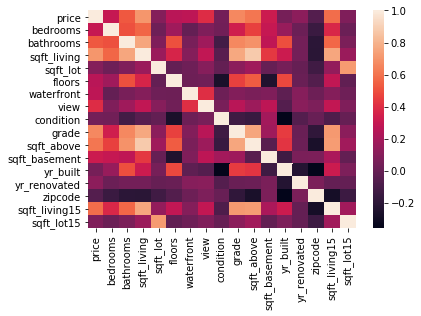

In [119]:
import seaborn as sns
sns.heatmap(H1.corr())

In [68]:
#Reading the Validation Data
v=pd.read_csv('wk3_kc_house_valid_data.csv')
v.shape


(9635, 21)

In [55]:
H=H1.copy()
#v.isnull().sum()


In [56]:
H.shape

(9761, 17)

In [ ]:
P_B=H[["price","grade"]].groupby(["grade"]).describe()
P_B 


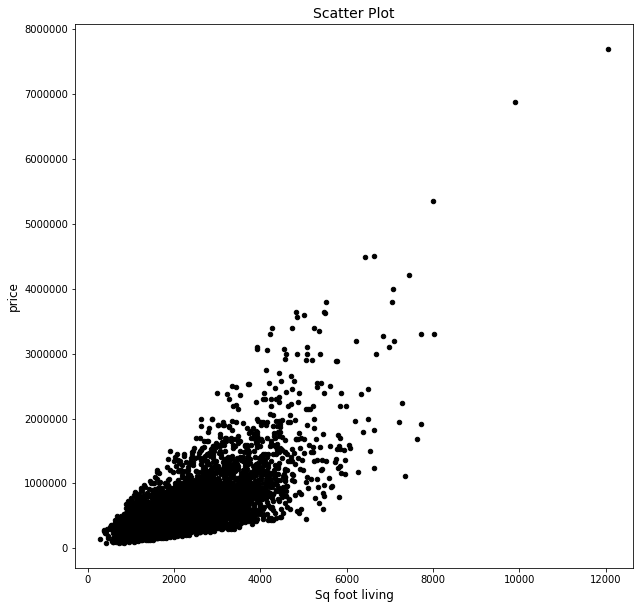

In [69]:
#Scatter plot 
H.plot(kind="scatter",           
          x="sqft_living",y="price",       
          color="black",            
          figsize=(10,10))            


plt.xlabel("Sq foot living", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter Plot", fontsize=14)

plt.show()

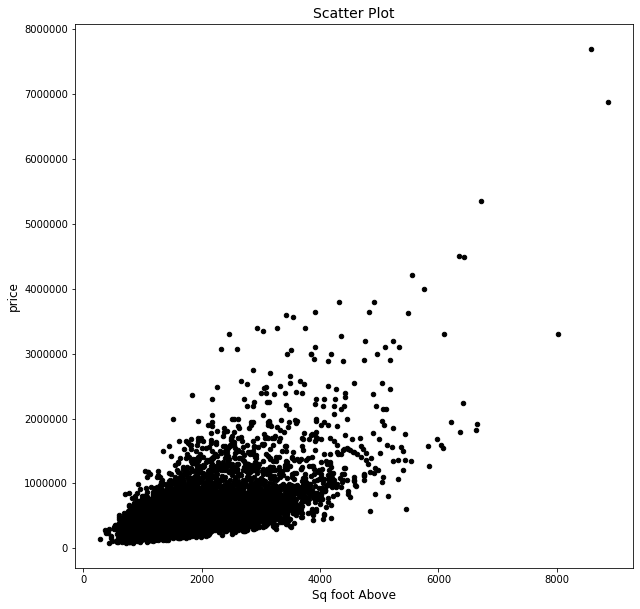

In [114]:
#Scatter plot 
H.plot(kind="scatter",           
          x="sqft_above",y="price",       
          color="black",            
          figsize=(10,10))          


plt.xlabel("Sq foot Above", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.title("Scatter Plot", fontsize=14)

plt.show()

In [137]:
#fitting the decision tree regressor on training data
from sklearn.tree import DecisionTreeRegressor

In [70]:
x_train=H[['bathrooms']]
y_train=H[['price']]


In [73]:
M=DecisionTreeRegressor(max_depth=3,min_samples_leaf=5)
M.fit(x_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
x_valid=v[['bathrooms']]
y_valid=v[['price']]

In [75]:
pre=M.predict(x_valid)
#pre

In [76]:
np.sqrt(np.mean((np.array(y_valid)-pre)**2))

419405.0684700114

In [77]:
x_train=H[['sqft_living','sqft_above']]
y_train=H[['price']]

In [78]:
M1=DecisionTreeRegressor(max_depth=3,min_samples_leaf=5)
M1.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
x_val=v[['sqft_living','sqft_above']]
y_valid=v[['price']]

In [80]:
pr=M1.predict(x_val)
#pr

In [81]:
np.sqrt(np.mean((np.array(y_valid)-pr)**2))

446239.68036576087

In [84]:
house=H1.copy()


In [85]:
x_t=house[['zipcode','grade','bathrooms','sqft_above','sqft_living','view','bedrooms','sqft_living15','sqft_basement']]
y_t=house[['price']]
type(x_t)

pandas.core.frame.DataFrame

In [86]:
dummy=pd.get_dummies(x_t['zipcode'])
dummy

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
x_t=pd.concat([x_t,dummy],axis=1)


In [88]:
x_t

,zipcode,grade,bathrooms,sqft_above,sqft_living,view,bedrooms,sqft_living15,sqft_basement,98001,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,98136,7,3.00,1050,1960,0,4,1360,910,0,...,0,0,0,0,0,0,0,0,0,0
1,98053,11,4.50,3890,5420,0,4,4760,1530,0,...,0,0,0,0,0,0,0,0,0,0
2,98115,7,1.00,860,1160,0,2,1330,300,0,...,0,0,0,0,0,0,0,0,0,0
3,98028,7,1.00,1430,1430,0,3,1780,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98074,7,1.75,1370,1370,0,3,1370,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,98144,8,2.00,1490,1490,0,3,1400,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,98056,9,2.50,2520,2520,0,4,2520,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,98136,9,3.50,2600,3510,0,4,2050,910,0,...,0,0,0,0,0,0,0,0,0,0
9759,98144,7,0.75,1020,1020,0,2,1020,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
x_t=x_t.drop(['zipcode'],axis=1)

In [90]:
x_t

,grade,bathrooms,sqft_above,sqft_living,view,bedrooms,sqft_living15,sqft_basement,98001,98002,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7,3.00,1050,1960,0,4,1360,910,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,4.50,3890,5420,0,4,4760,1530,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1.00,860,1160,0,2,1330,300,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1.00,1430,1430,0,3,1780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,1.75,1370,1370,0,3,1370,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,8,2.00,1490,1490,0,3,1400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,9,2.50,2520,2520,0,4,2520,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,9,3.50,2600,3510,0,4,2050,910,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,7,0.75,1020,1020,0,2,1020,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
xv=v[['zipcode','grade','bathrooms','sqft_above','sqft_living','view','bedrooms','sqft_living15','sqft_basement']]
yv=v[['price']]
xv.shape

(9635, 9)

In [92]:
dummy_val=pd.get_dummies(xv['zipcode'])
dummy_val

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9633,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [93]:
xv=pd.concat([xv,dummy_val],axis=1)

In [94]:
xv

,zipcode,grade,bathrooms,sqft_above,sqft_living,view,bedrooms,sqft_living15,sqft_basement,98001,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,98178,7,1.00,1180,1180,0,3,1340,0,0,...,0,0,0,0,0,0,1,0,0,0
1,98125,7,2.25,2170,2570,0,3,1690,400,0,...,0,0,0,0,0,0,0,0,0,0
2,98028,6,1.00,770,770,0,2,2720,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98074,8,2.00,1680,1680,0,3,1800,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98003,7,2.25,1715,1715,0,3,2238,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,98010,6,1.75,1500,1500,0,3,1320,0,0,...,0,0,0,0,0,0,0,0,0,0
9631,98116,8,2.50,1180,1310,0,3,1330,130,0,...,0,0,0,0,0,0,0,0,0,0
9632,98103,8,2.50,1530,1530,0,3,1530,0,0,...,0,0,0,0,0,0,0,0,0,0
9633,98146,8,2.50,2310,2310,0,4,1830,0,0,...,1,0,0,0,0,0,0,0,0,0


In [95]:
xv=xv.drop(['zipcode'],axis=1)

In [96]:
xv

,grade,bathrooms,sqft_above,sqft_living,view,bedrooms,sqft_living15,sqft_basement,98001,98002,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7,1.00,1180,1180,0,3,1340,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,2.25,2170,2570,0,3,1690,400,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1.00,770,770,0,2,2720,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,2.00,1680,1680,0,3,1800,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,2.25,1715,1715,0,3,2238,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,6,1.75,1500,1500,0,3,1320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9631,8,2.50,1180,1310,0,3,1330,130,0,0,...,0,0,0,0,0,0,0,0,0,0
9632,8,2.50,1530,1530,0,3,1530,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9633,8,2.50,2310,2310,0,4,1830,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
M1=LinearRegression()

In [99]:
M1.fit(x_t,y_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Predicting values of y on the validation data

In [100]:
M1_pred=M1.predict(xv)

In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
mse=mean_squared_error(yv,M1_pred)
                       

In [103]:
rmse=np.sqrt(mse)

In [104]:
rmse

168557.3892913569

###Predicting values of y on the test data

In [105]:
test=pd.read_csv('wk3_kc_house_test_data.csv')
test.shape

(2217, 21)

In [106]:
x_test=test[['zipcode','grade','bathrooms','sqft_above','sqft_living','view','bedrooms','sqft_living15','sqft_basement']]
y_test=test[['price']]

###Adding dummy variable for zipcode and predicting y for test data

In [107]:
dummy_test=pd.get_dummies(test['zipcode'])

In [108]:
x_test=pd.concat([x_test,dummy_test],axis=1)

In [109]:
x_test=x_test.drop(['zipcode'],axis=1)

In [110]:
test_predict=M1.predict(x_test)

###Calculating RMSE for Test Data

In [111]:
mse_test=mean_squared_error(y_test,test_predict)

In [112]:
rmse_test=np.sqrt(mse_test)

In [113]:
rmse_test

161159.57344935357

###Fitting the Regression Tree 

In [147]:
M_tree=DecisionTreeRegressor(max_depth=3,min_samples_leaf=4)
M_tree.fit(x_t,y_t)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [148]:
M1_tree_pred=M_tree.predict(xv)

In [149]:
mse_tree=mean_squared_error(yv,M1_tree_pred)

In [150]:
rmse_tree=np.sqrt(mse_tree)
rmse_tree

245774.19617155302

In [151]:
M1_tree_pred_test=M_tree.predict(x_test)

In [152]:
mse_tree_test=mean_squared_error(y_test,M1_tree_pred_test)

In [153]:
rmse_tree_test=np.sqrt(mse_tree_test)
rmse_tree_test

252105.4262131166